In [0]:
!unzip "/content/drive/My Drive/Colab Notebooks/NLP mini project/BBC News Train.csv.zip" -d "/content/drive/My Drive/Colab Notebooks/NLP mini project/"

Archive:  /content/drive/My Drive/Colab Notebooks/NLP mini project/BBC News Train.csv.zip
  inflating: /content/drive/My Drive/Colab Notebooks/NLP mini project/BBC News Train.csv  


In [0]:
!unzip "/content/drive/My Drive/Colab Notebooks/NLP mini project/BBC News Test.csv.zip" -d "/content/drive/My Drive/Colab Notebooks/NLP mini project/"

Archive:  /content/drive/My Drive/Colab Notebooks/NLP mini project/BBC News Test.csv.zip
  inflating: /content/drive/My Drive/Colab Notebooks/NLP mini project/BBC News Test.csv  


In [0]:
%tensorflow_version 2.x

In [0]:
import tensorflow as tf
tf.__version__

'2.2.0'

In [0]:
import pandas as pd
import numpy as np

In [0]:
df_train = pd.read_csv("/content/drive/My Drive/Colab Notebooks/NLP mini project/BBC News Train.csv")

In [0]:
df_train.shape

(1490, 3)

In [0]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.0+ KB


In [0]:
df_train.drop(["ArticleId"],axis=1,inplace=True)

In [0]:
set(df_train["Category"])

{'business', 'entertainment', 'politics', 'sport', 'tech'}

In [0]:
df_train["labels"] = df_train["Category"].map({"business":0,"entertainment":1,"politics":2,"sport":3,"tech":4})

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(df_train["Text"],df_train["labels"],test_size=0.3, random_state=0)

In [0]:
X_train.shape, X_val.shape, Y_train.shape, Y_val.shape

((1043,), (447,), (1043,), (447,))

In [0]:
set(Y_train)

{0, 1, 2, 3, 4}

In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [0]:
MAX_NO_OF_UNIQUE_WORDS = 30000
tokenizer = Tokenizer(num_words=MAX_NO_OF_UNIQUE_WORDS)
tokenizer.fit_on_texts(X_train)

In [0]:
temp1 = tokenizer.texts_to_matrix(X_train)

In [0]:
tokenizer.get_config()

In [0]:
X_train = tokenizer.texts_to_sequences(X_train)
X_val = tokenizer.texts_to_sequences(X_val)

In [0]:
len_of_seq_train = [ len(s) for s in X_train]
max_len_after_pad_train = max(len_of_seq_train)
print(max_len_after_pad_train)

3356


In [0]:
len_of_seq_val = [ len(s) for s in X_val ]
max_len_after_pad_val = max(len_of_seq_val)
print(max_len_after_pad_val)

1644


In [0]:
MAX_LEN_OF_SEQ = max([max_len_after_pad_train,max_len_after_pad_val])
print(MAX_LEN_OF_SEQ)

3356


In [0]:
word2idx = tokenizer.word_index
V = len(word2idx)
print("no of unique words = ",V)

no of unique words =  21396


In [0]:
X_train = pad_sequences(X_train)
print("Paded shape : ",X_train.shape)
T = X_train.shape[1]

Paded shape :  (1043, 3356)


In [0]:
X_val = pad_sequences(X_val, maxlen=T)
print("Paded shape : ",X_val.shape)

Paded shape :  (447, 3356)


In [0]:
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Dense, Embedding, GlobalMaxPooling1D, Concatenate, Dropout
from tensorflow.keras.models import Model

In [0]:
D = 60

i = Input(shape=(T,))
x = Embedding(V+1,D)(i)
x = Conv1D(32,3)(x)
x = MaxPooling1D(3)(x)
x = Conv1D(64,3)(x)
x = MaxPooling1D(3)(x)
x = Conv1D(128,3)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(5,activation="softmax")(x)

model = Model(i,x)

In [0]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 3356)]            0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 3356, 60)          1283820   
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 3354, 32)          5792      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 1118, 32)          0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 1116, 64)          6208      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 372, 64)           0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 370, 128)          2470

In [0]:
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [0]:
r = model.fit(X_train,Y_train, batch_size=32, epochs=10, validation_data=(X_val,Y_val))

Epoch 1/10
33/33 [==============================] - 2s 46ms/step - loss: 1.6039 - accuracy: 0.2196 - val_loss: 1.5953 - val_accuracy: 0.2215
Epoch 2/10
33/33 [==============================] - 1s 33ms/step - loss: 1.5302 - accuracy: 0.3490 - val_loss: 1.5118 - val_accuracy: 0.4072
Epoch 3/10
33/33 [==============================] - 1s 34ms/step - loss: 1.1217 - accuracy: 0.6232 - val_loss: 0.7431 - val_accuracy: 0.7875
Epoch 4/10
33/33 [==============================] - 1s 34ms/step - loss: 0.2939 - accuracy: 0.9319 - val_loss: 0.2909 - val_accuracy: 0.8881
Epoch 5/10
33/33 [==============================] - 1s 35ms/step - loss: 0.0181 - accuracy: 0.9981 - val_loss: 0.2220 - val_accuracy: 0.9239
Epoch 6/10
33/33 [==============================] - 1s 34ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.1948 - val_accuracy: 0.9374
Epoch 7/10
33/33 [==============================] - 1s 34ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.2200 - val_accuracy: 0.9262
Epoch 8/10
33

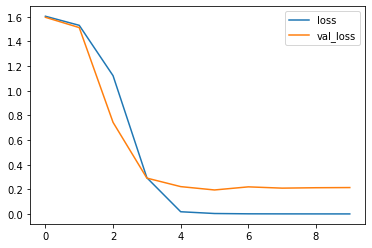

In [0]:
import matplotlib.pyplot as plt

plt.plot(r.history["loss"],label="loss")
plt.plot(r.history["val_loss"],label="val_loss")
plt.legend()
plt.show()

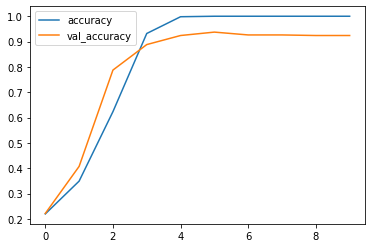

In [0]:
plt.plot(r.history["accuracy"],label="accuracy")
plt.plot(r.history["val_accuracy"],label="val_accuracy")
plt.legend()
plt.show()

In [0]:
model.save("/content/drive/My Drive/Colab Notebooks/NLP mini project/model.h5")

In [0]:
df_test = pd.read_csv("/content/drive/My Drive/Colab Notebooks/NLP mini project/BBC News Test.csv")
X_test = tokenizer.texts_to_sequences(df_test["Text"])
X_test = pad_sequences(X_test, maxlen=T)

In [0]:
X_test.shape

(735, 3356)

In [0]:
res = model.predict(X_test)

In [0]:
res.shape

(735, 5)

In [0]:
res[0]

array([1.1916641e-09, 2.9604429e-02, 3.1398700e-04, 9.7008163e-01,
       8.8579304e-09], dtype=float32)

In [0]:
labels = ["business","entertainment","politics","sport","tech"]
preds = []
for c in res:
  idx = np.argmax(c)
  preds.append(labels[idx])

In [0]:
len(preds)

735

In [0]:
sample_sub = pd.read_csv("/content/drive/My Drive/Colab Notebooks/NLP mini project/BBC News Sample Solution.csv")

In [0]:
df_test["Category"] = preds

In [0]:
df_new = df_test.drop(["Text"],axis=1)

In [0]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  735 non-null    int64 
 1   Text       735 non-null    object
 2   Category   735 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.4+ KB


In [0]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  735 non-null    int64 
 1   Category   735 non-null    object
dtypes: int64(1), object(1)
memory usage: 11.6+ KB


In [0]:
codf_new.to_csv("/ntent/drive/My Drive/Colab Notebooks/NLP mini project/sub_2.csv",index=False)

In [0]:
df_temp=pd.read_csv("/content/drive/My Drive/Colab Notebooks/NLP mini project/BBC News Train.csv")
df_temp["Text"][0]

'worldcom ex-boss launches defence lawyers defending former worldcom chief bernie ebbers against a battery of fraud charges have called a company whistleblower as their first witness.  cynthia cooper  worldcom s ex-head of internal accounting  alerted directors to irregular accounting practices at the us telecoms giant in 2002. her warnings led to the collapse of the firm following the discovery of an $11bn (£5.7bn) accounting fraud. mr ebbers has pleaded not guilty to charges of fraud and conspiracy.  prosecution lawyers have argued that mr ebbers orchestrated a series of accounting tricks at worldcom  ordering employees to hide expenses and inflate revenues to meet wall street earnings estimates. but ms cooper  who now runs her own consulting business  told a jury in new york on wednesday that external auditors arthur andersen had approved worldcom s accounting in early 2001 and 2002. she said andersen had given a  green light  to the procedures and practices used by worldcom. mr ebb

In [0]:
#Single query ----------------------
q = df_test["Text"][1]
q = tokenizer.texts_to_sequences([q])
print("t t s : ",q)
q = pad_sequences(q, maxlen=T)
print("pad : ",q)

t t s :  [[215, 1941, 106, 62, 147, 215, 10, 55, 28, 78, 1774, 316, 11884, 4, 270, 1749, 21, 5, 541, 23, 45, 15, 167, 18, 2990, 7300, 578, 3, 938, 559, 19, 39, 1149, 3119, 52, 5507, 949, 4, 11885, 20, 3682, 101, 2906, 2, 1522, 3208, 2037, 1, 2028, 529, 1, 304, 660, 11, 9, 5, 468, 172, 6, 1, 118, 372, 9, 7991, 4, 3330, 23, 3275, 5513, 24, 1073, 25, 1, 9471, 3709, 3, 90, 215, 1, 304, 9, 5, 1932, 2445, 178, 298, 150, 9472, 4, 1514, 11388, 11886, 215, 29, 20, 1242, 2707, 2, 924, 5, 304, 35, 55, 1774, 311, 1610, 1475, 11, 4, 16457, 7629, 1420, 471, 504, 43, 4, 43, 274, 24, 1411, 585, 6, 2705, 2566, 18, 5, 500, 3, 372, 7549, 11885, 4, 372, 5976, 24, 112, 4736, 1480, 27, 471, 32, 1130, 233, 2, 1, 291, 2421, 1722, 949, 996, 8627, 5, 778, 2960, 12, 42, 2902, 25, 11887, 279, 578, 10, 43, 60, 1716, 3, 2391, 4, 644, 266, 20, 39, 1829, 3, 76, 491, 3, 5507, 949, 11886, 215, 19, 229, 40, 17, 4377, 2, 2157, 2, 5, 328, 687, 10, 113, 3330, 994, 12, 5, 541, 19, 28, 39, 16458, 17, 7992, 1, 6952, 8, 1370, 

In [0]:
res = model.predict(q)

In [0]:
for c in res:
  idx = np.argmax(c)
  print(labels[idx])
  

tech


In [0]:
import pickle

# saving
with open('/content/drive/My Drive/Colab Notebooks/NLP mini project/tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [0]:
# loading
with open('/content/drive/My Drive/Colab Notebooks/NLP mini project/tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [0]:
layer_name = 'global_max_pooling1d_1'
intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.get_layer(layer_name).output)
intermediate_output = intermediate_layer_model.predict(q)

In [0]:
intermediate_output[0].shape

(128,)

In [0]:
type(intermediate_output[0])

numpy.ndarray